In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('content/data.csv')

In [3]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [4]:
df.shape

(36, 5)

In [5]:
print(df.corr(numeric_only = True))

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [7]:
print(df.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [9]:
X = df[['Weight','Volume']]
y = df['CO2']


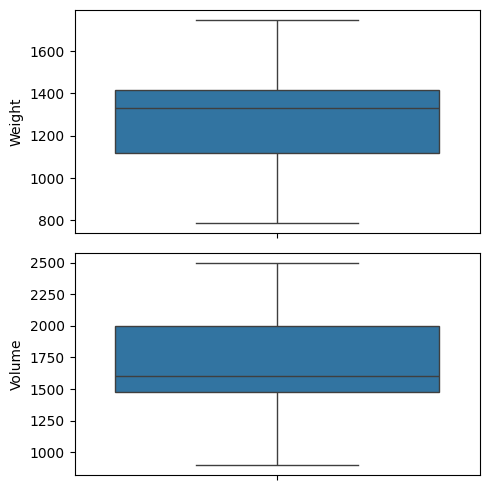

In [10]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
plt2 = sns.boxplot(df['Volume'], ax = axs[1])
plt.tight_layout()

<Axes: xlabel='CO2', ylabel='Density'>

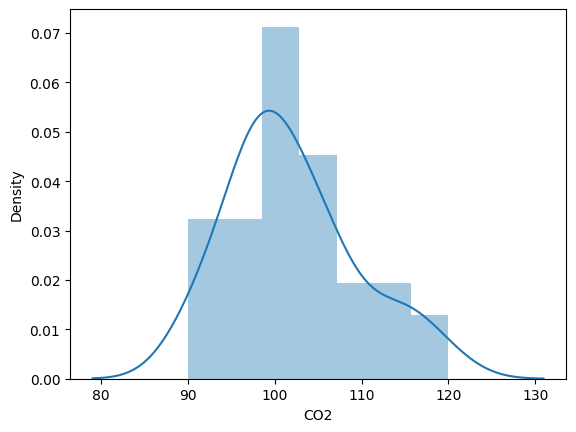

In [11]:
sns.distplot(df['CO2'])

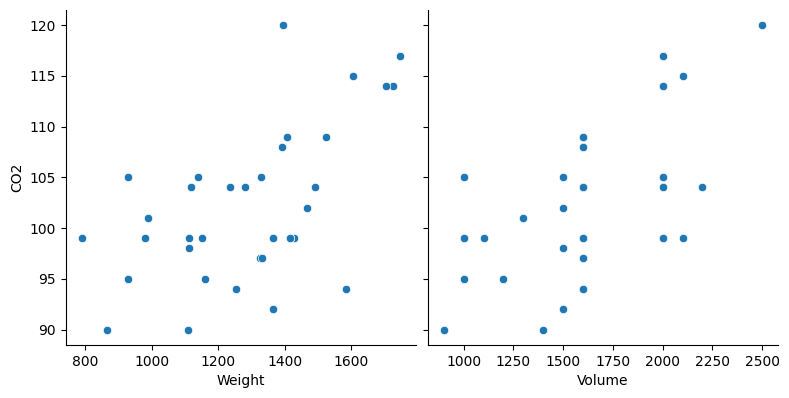

In [12]:
sns.pairplot(df, x_vars = ['Weight', 'Volume'], y_vars = 'CO2', height = 4, aspect = 1, kind = 'scatter')
plt.show()

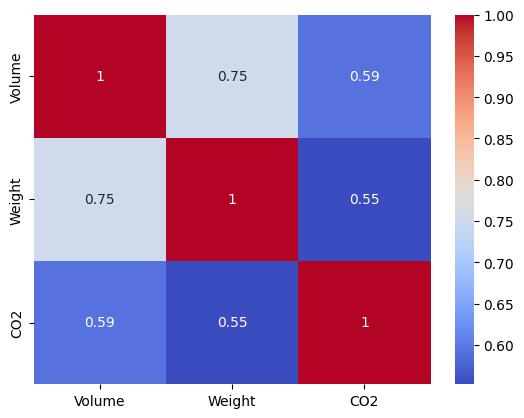

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot = True, cmap = 'coolwarm')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 100)


In [17]:
y_train.shape

(25,)

In [18]:
y_test.shape

(11,)

In [19]:
reg_model = linear_model.LinearRegression()

In [20]:
reg_model = LinearRegression().fit(X_train, y_train)

In [21]:
print('Intercept : ', reg_model.intercept_)
list(zip(X, reg_model.coef_))

Intercept :  74.33882836589245


[('Weight', np.float64(0.0171800645996374)),
 ('Volume', np.float64(0.0025046399866402976))]

In [22]:
y_pred = reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [24]:
print('Prediction for test set : {}'.format(y_pred))

Prediction for test set : [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [25]:
reg_model_diff = pd.DataFrame({'Actual value' : y_test, 'Predicted value ' : y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [26]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('mae', mae)
print('mse', mse)
print('rmse', r2)

mae 6.901980901636316
mse 63.39765310998794
rmse 7.96226432053018


In [38]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [32]:
lr = LinearRegression()
ridge = Ridge(alpha = 1.0)
lasso = Lasso(alpha = 0.1)

In [39]:
models = {'Linear Regression' : lr, 'Ridge' : ridge, 'Lasso' : lasso}

for name,model in models.items() : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'\n {name} Results:')
    print(f'MAE : {mae:.4f}')
    print(f'MSE : {mse:.4f}')
    print(f'RMSE : {rmse:.4f}')
    print(f'R2 : {r2:.4f}')


 Linear Regression Results:
MAE : 6.3356
MSE : 58.0793
RMSE : 7.6210
R2 : 0.3294

 Ridge Results:
MAE : 6.3356
MSE : 58.0793
RMSE : 7.6210
R2 : 0.3294

 Lasso Results:
MAE : 6.3357
MSE : 58.0828
RMSE : 7.6212
R2 : 0.3294


In [40]:
print("Linear Coefs:", lr.coef_)
print("Ridge Coefs:", ridge.coef_)
print("Lasso Coefs:", lasso.coef_)

Linear Coefs: [0.00804928 0.00428741]
Ridge Coefs: [0.00804927 0.00428742]
Lasso Coefs: [0.00804808 0.0042872 ]
